In [1]:
import pandas as pd
import os
os.chdir("C:\\Users\\Zber\\Documents\\Dev_program\\OpenRadar")
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.manifold import TSNE
from matplotlib.lines import Line2D

In [2]:
res_dir = "C:/Users/Zber/Documents/Dev_program/OpenRadar/FER/results/KD_TSNE_20220620-190236"
imag_path =os.path.join(res_dir, 'image.npy')
kd_path =os.path.join(res_dir, 'kd.npy')
imag = np.load(imag_path)
kd = np.load(kd_path)
label_path = os.path.join(res_dir, 'labels.npy')
labels = np.load(label_path)

In [3]:
def min_max(X):
    mmm = np.max(X)
    mm = np.min(X)
    X_std = (X - mm) / (mmm - mm)
    return X_std

In [4]:
X_tsne_image = TSNE(n_components=2, random_state=33).fit_transform(imag)
X_tsne_image[:, 0] = min_max(X_tsne_image[:, 0])
X_tsne_image[:, 1] = min_max(X_tsne_image[:, 1])


X_tsne_kd = TSNE(n_components=2, random_state=66).fit_transform(kd)
X_tsne_kd[:, 0] = min_max(X_tsne_kd[:, 0])
X_tsne_kd[:, 1] = min_max(X_tsne_kd[:, 1])

c:\Users\Zber\anaconda3\envs\Emo\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
c:\Users\Zber\anaconda3\envs\Emo\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
c:\Users\Zber\anaconda3\envs\Emo\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
c:\Users\Zber\anaconda3\envs\Emo\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


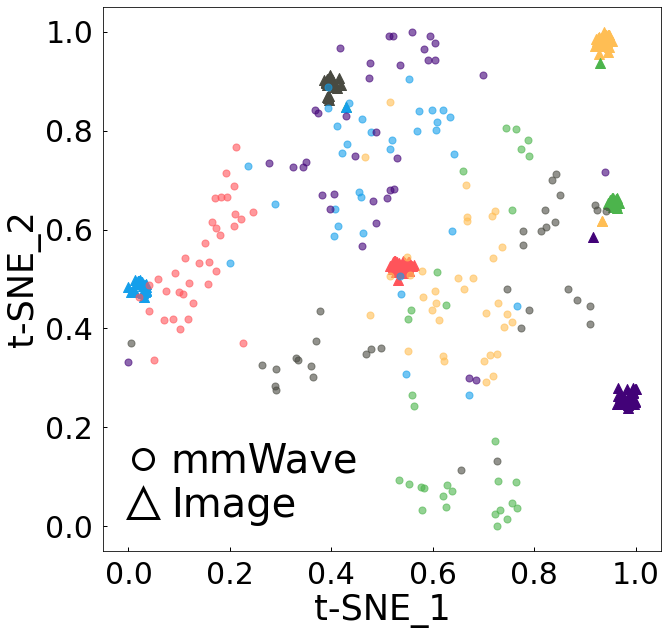

In [5]:
fig, ax = plt.subplots(figsize=(10, 10))

ax.spines['top'].set_visible(True)
ax.spines['right'].set_visible(True)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

markers = ["o", "^"]

colors = ["#FF545A","#FFBE54",'#4CB44C',"#149FEB","#420278","#494a41"] #"#F4820B"

ll =["mmWave", "Image"]

ms = 50

for s in range(0, 6):
    sub_index = (labels == s)
    ax.scatter(X_tsne_image[sub_index, 0], X_tsne_image[sub_index, 1], marker=markers[1], c=colors[s], s=ms * 2)

    ax.scatter(X_tsne_kd[sub_index, 0], X_tsne_kd[sub_index, 1], marker=markers[0],c = colors[s], s=ms, zorder= 20, alpha=.6)



legend_s = [Line2D([0], [0], marker=m, color='w', mew=3, markerfacecolor=None, markeredgecolor='black', label=ll[s],
                markersize=15) for m, s in zip(markers, range(0, 2))]



ax.set_ylabel("t-SNE_2", fontsize=35)
ax.set_xlabel("t-SNE_1", fontsize=35)

ax.xaxis.set_tick_params(labelsize=30, length=4, direction='in', width=1, pad=10)
ax.yaxis.set_tick_params(labelsize=30, length=4, direction='in', width=1, pad=10)

# ax.xaxis.labelpad = 4
# ax.yaxis.labelpad = 4
l = ax.legend(handles=legend_s, loc="lower center", prop={'size': 40, }, ncol=1, bbox_to_anchor=(.25, -0.02),
                    fancybox=True, framealpha=0.0, labelspacing=0.1, handletextpad=0.3, columnspacing=0.3, handlelength=0.8)

# ax.set_xticks([])
# ax.set_yticks([])
ax.spines['top'].set_visible(True)
ax.spines['right'].set_visible(True)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
# ax.add_artist(legend1)
# ax.add_artist(legend2)
# fig.savefig('C:/Users/Zber/Desktop/mmEmo_Exp/0.Method/kd_image_tsne.pdf', format='pdf', bbox_inches="tight")
l.legendHandles[0]._legmarker.set_markersize(20)
l.legendHandles[1]._legmarker.set_markersize(30)
fig.savefig('C:/Users/Zber/Desktop/mmEmo_Exp/0.Method/m2_2.svg', format='svg', bbox_inches="tight")

In [6]:
# calculate centroid for each class
imag_centroids = []
for s in range(0, 7):
    sub_index = (labels == s)
    cen = np.mean(X_tsne_image[sub_index], axis=0)
    imag_centroids.append(cen)

In [7]:
# calculate centroid for each class
our_centroids = []
for s in range(0, 7):
    sub_index = (labels == s)
    cen = np.mean(X_tsne_kd[sub_index], axis=0)
    our_centroids.append(cen)

In [8]:
from sklearn.metrics.pairwise import paired_distances
pdist = paired_distances(imag_centroids, our_centroids)

In [9]:
pdist

array([0.3995767 , 0.5588169 , 0.47334334, 0.5047175 , 0.70379615,
       0.5005697 , 0.46438688], dtype=float32)

In [10]:
inner_dsit = []
for s in range(0, 7):
    sub_index = (labels == s)
    sub_data = X_tsne_kd[sub_index]
    sub_centroid = np.mean(X_tsne_image[sub_index], axis=0)
    sub_dist = []
    for data in sub_data:
        sub_dist.append(np.linalg.norm((data-sub_centroid)))
    inner_dsit.append(np.mean(sub_dist))

In [11]:
inner_dsit

[0.41359192,
 0.5706445,
 0.52628076,
 0.5285324,
 0.72931886,
 0.57834005,
 0.5841453]

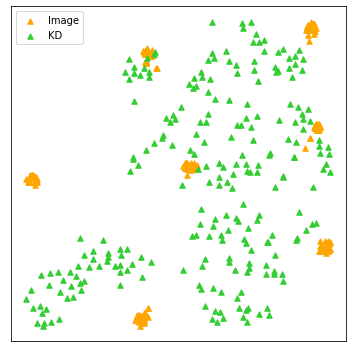

In [14]:
colors = ['orange', 'limegreen']
labels = ['KD', 'Image']

fig, ax= plt.subplots(figsize=(5, 5))

ax.scatter(X_tsne_image[:, 0], X_tsne_image[:, 1], marker='^', c=colors[0],
            s=15*2, label='{}'.format(labels[1]))

ax.scatter(X_tsne_kd[:, 0], X_tsne_kd[:, 1], marker='^', c=colors[1],
            s=15*2, label='{}'.format(labels[0]))

ax.spines['top'].set_visible(True)
ax.spines['right'].set_visible(True)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
ax.set_xticks([])
ax.set_yticks([])
ax.legend()
plt.tight_layout()
fig.savefig('C:/Users/Zber/Desktop/mmEmo_Exp/0.Method/kd_image_tsne.pdf', format='pdf', bbox_inches="tight")